In [529]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [530]:
train = pd.read_csv(r'C:\Users\user\Desktop\data\sales_train.csv')
test = pd.read_csv(r'C:\Users\user\Desktop\data\test.csv')
item = pd.read_csv(r'C:\Users\user\Desktop\data\items.csv')

In [531]:
train['date']=pd.to_datetime(train['date'], format= "%d.%m.%Y")


In [532]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [533]:
train.shape

(2935849, 6)

In [534]:
train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [535]:
train.sort_values(['date'], inplace = True)

In [536]:
train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2885098,2015-10-31,33,41,21386,169.0,1.0
2930981,2015-10-31,33,21,988,199.0,1.0
2885097,2015-10-31,33,41,21377,169.0,1.0
2930993,2015-10-31,33,22,10207,1199.0,1.0
2928850,2015-10-31,33,24,3042,3199.0,1.0


In [537]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 49800 to 2928850
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 156.8 MB


In [538]:
train.describe(include = 'all')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2935849,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
unique,1034,NaN,NaN,NaN,NaN,NaN
top,2013-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,9434,NaN,NaN,NaN,NaN,NaN
first,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2015-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,NaN,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,NaN,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00


In [539]:
item.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [540]:
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year

In [541]:
train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year
2885098,2015-10-31,33,41,21386,169.0,1.0,10,2015
2930981,2015-10-31,33,21,988,199.0,1.0,10,2015
2885097,2015-10-31,33,41,21377,169.0,1.0,10,2015
2930993,2015-10-31,33,22,10207,1199.0,1.0,10,2015
2928850,2015-10-31,33,24,3042,3199.0,1.0,10,2015


In [542]:
train_2 = pd.merge(train,item.iloc[:,1:3],on = 'item_id')

In [543]:
train_2.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,item_category_id
0,2013-01-01,0,18,5823,2500.0,1.0,1,2013,35
1,2013-01-01,0,54,5823,2499.5,1.0,1,2013,35
2,2013-01-02,0,54,5823,2500.0,1.0,1,2013,35
3,2013-01-02,0,42,5823,2490.0,1.0,1,2013,35
4,2013-01-02,0,56,5823,2500.0,1.0,1,2013,35


In [544]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   date              datetime64[ns]
 1   date_block_num    int64         
 2   shop_id           int64         
 3   item_id           int64         
 4   item_price        float64       
 5   item_cnt_day      float64       
 6   month             int64         
 7   year              int64         
 8   item_category_id  int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 224.0 MB


In [545]:
train_2.isnull().sum()

date                0
date_block_num      0
shop_id             0
item_id             0
item_price          0
item_cnt_day        0
month               0
year                0
item_category_id    0
dtype: int64

In [546]:
test['month'] = 11
test['year'] = 2

In [547]:
test.tail()

,ID,shop_id,item_id,month,year
214195,214195,45,18454,11,2
214196,214196,45,16188,11,2
214197,214197,45,15757,11,2
214198,214198,45,19648,11,2
214199,214199,45,969,11,2


In [548]:
test_2 = pd.merge(test, item.iloc[:,1:3],on = 'item_id')

In [549]:
test_2.head()

,ID,shop_id,item_id,month,year,item_category_id
0,0,5,5037,11,2,19
1,5100,4,5037,11,2,19
2,10200,6,5037,11,2,19
3,15300,3,5037,11,2,19
4,20400,2,5037,11,2,19


In [550]:
test_2.isnull().sum()

ID                  0
shop_id             0
item_id             0
month               0
year                0
item_category_id    0
dtype: int64

In [132]:
x = []
for i in range(test_2.shape[0]):
    a = train_2['shop_id'] == test_2.iloc[i,1]
    b = train_2['item_id'] == test_2.iloc[i,2]
    c = train_2['item_category_id'] == test_2.iloc[i,3]
    y = train_2[a & b]['item_price']
    if len(y) != 0:
        x.append(y.iloc[-1])
    elif len(y) == 0:
        y = train_2[b]['item_price']
        if len(y) != 0:
            x.append(y.iloc[-1])
        else:
            x.append(train_2[c]['item_price'].mean())
    print(len(x))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119


KeyboardInterrupt: 

In [ ]:
test_2.to_csv(r'C:\Users\user\Desktop\data\test_2.csv')

In [551]:
test_2 = pd.read_csv(r'C:\Users\user\Desktop\data\test_2.csv')

In [552]:
test_2.head()


In [553]:
train_3 = train_2.groupby(['date_block_num', 'shop_id', 'item_id', 'month', 'year'])['item_cnt_day'].sum()

In [554]:
train_3 = train_3.to_frame()
train_3.reset_index(inplace = True)

In [555]:
money = train_2.groupby(['date_block_num', 'shop_id', 'item_id', 'month'])['item_price'].mean()

In [556]:
money = money.to_frame()
money.reset_index(inplace = True)

In [557]:
train_3 = pd.concat([train_3, money['item_price']],axis = 1)

In [558]:
train_3

,date_block_num,shop_id,item_id,month,year,item_cnt_day,item_price
0,0,0,32,1,2013,6.0,221.0
1,0,0,33,1,2013,3.0,347.0
2,0,0,35,1,2013,1.0,247.0
3,0,0,43,1,2013,1.0,221.0
4,0,0,51,1,2013,2.0,128.5
...,...,...,...,...,...,...,...
1609119,33,59,22087,10,2015,6.0,119.0
1609120,33,59,22088,10,2015,2.0,119.0
1609121,33,59,22091,10,2015,1.0,179.0
1609122,33,59,22100,10,2015,1.0,629.0


In [559]:
train_4 = pd.merge(train_3,item.iloc[:,1:3], on = 'item_id' )
train_4 = train_4.rename(columns= {'item_cnt_day':'item_cnt_month'})

In [560]:
train_4.loc[train_4['year'] == 2013,'year'] =0
train_4.loc[train_4['year'] == 2014,'year'] =1
train_4.loc[train_4['year'] == 2015,'year'] =2


In [561]:
train_4

,date_block_num,shop_id,item_id,month,year,item_cnt_month,item_price,item_category_id
0,0,0,32,1,0,6.0,221.0,40
1,0,1,32,1,0,7.0,221.0,40
2,0,3,32,1,0,3.0,349.0,40
3,0,4,32,1,0,2.0,349.0,40
4,0,6,32,1,0,8.0,349.0,40
...,...,...,...,...,...,...,...,...
1609119,33,55,12733,10,2,2.0,1490.0,76
1609120,33,55,13092,10,2,1.0,2000.0,36
1609121,33,55,16797,10,2,1.0,790.0,78
1609122,33,55,18060,10,2,1.0,172.0,44


In [562]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [350]:
x_train = train_4[[ 'shop_id', 'item_category_id','month', 'year']]
y_train = train_4['item_price'].values

In [351]:
x_train1 = to_categorical(x_train['shop_id'])
x_train2 = to_categorical(x_train['item_category_id'])
x_train3 = to_categorical(x_train['month'] )
x_train4 = to_categorical(x_train['year'])

In [352]:
x_train = pd.concat([pd.DataFrame(x_train1), pd.DataFrame(x_train2),pd.DataFrame(x_train3), pd.DataFrame(x_train4)], axis = 1)

In [353]:
x_train = x_train.values.reshape((x_train.shape[0], 1, x_train.shape[1]))

In [354]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [355]:
 model = Sequential()
 model.add(LSTM(140, dropout = 0.2, recurrent_dropout = 0.2, input_shape = (x_train.shape[1],x_train.shape[2])))
 model.add(Dense(90,activation = 'relu'))
 model.add(Dense(1))
 model.compile(loss = 'mse', optimizer = 'adam')
 model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 140)               168560    
_________________________________________________________________
dense_14 (Dense)             (None, 90)                12690     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 91        
Total params: 181,341
Trainable params: 181,341
Non-trainable params: 0
_________________________________________________________________


In [356]:
history = model.fit(x_train, y_train, batch_size = 100, epochs = 15, validation_data=(x_validation, y_validation))

Train on 1287299 samples, validate on 321825 samples
Epoch 1/15
1287299/1287299 [==============================] - 152s 118us/sample - loss: 994431.6654 - val_loss: 467765.6205
Epoch 2/15
1287299/1287299 [==============================] - 149s 115us/sample - loss: 673728.6673 - val_loss: 456694.9149
Epoch 3/15
1287299/1287299 [==============================] - 149s 116us/sample - loss: 630982.8390 - val_loss: 450178.7208
Epoch 4/15
1287299/1287299 [==============================] - 148s 115us/sample - loss: 593140.7735 - val_loss: 446847.9678
Epoch 5/15
1287299/1287299 [==============================] - 148s 115us/sample - loss: 569173.3974 - val_loss: 446997.1294
Epoch 6/15
1287299/1287299 [==============================] - 148s 115us/sample - loss: 564171.6254 - val_loss: 442211.2641
Epoch 7/15
1287299/1287299 [==============================] - 148s 115us/sample - loss: 548327.3968 - val_loss: 435323.0887
Epoch 8/15
1287299/1287299 [==============================] - 148s 115us/sample

In [563]:
from sklearn.preprocessing import StandardScaler

In [564]:
std = StandardScaler()

In [566]:
train_4['item_cnt_month'] = std.fit_transform(train_4['item_cnt_month'].values.reshape(-1,1))
train_4['item_price'] = std.fit_transform(train_4['item_price'].values.reshape(-1,1))
train_4['item_id'] = std.fit_transform(train_4['item_id'].values.reshape(-1,1))

In [567]:
train_4.head()

,date_block_num,shop_id,item_id,month,year,item_cnt_month,item_price,item_category_id
0,0,0,-1.706875,1,0,0.431544,-0.367287,40
1,0,1,-1.706875,1,0,0.547152,-0.367287,40
2,0,3,-1.706875,1,0,0.084718,-0.284792,40
3,0,4,-1.706875,1,0,-0.030891,-0.284792,40
4,0,6,-1.706875,1,0,0.662761,-0.284792,40


In [568]:
train_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609124 entries, 0 to 1609123
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   date_block_num    1609124 non-null  int64  
 1   shop_id           1609124 non-null  int64  
 2   item_id           1609124 non-null  float64
 3   month             1609124 non-null  int64  
 4   year              1609124 non-null  int64  
 5   item_cnt_month    1609124 non-null  float64
 6   item_price        1609124 non-null  float64
 7   item_category_id  1609124 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 110.5 MB


In [569]:
x_train = train_4[[ 'shop_id', 'item_category_id','month', 'item_price', 'year', 'item_id']]
y_train = train_4['item_cnt_month'].values

In [570]:
x_train1 = to_categorical(x_train['shop_id'])
x_train2 = to_categorical(x_train['item_category_id'])
x_train3 = to_categorical(x_train['month'] )
x_train4 = to_categorical(x_train['year'])

In [571]:
x_train = pd.concat([pd.DataFrame(x_train1), pd.DataFrame(x_train2),pd.DataFrame(x_train3),pd.DataFrame(x_train4), x_train['item_price'], x_train['item_id']], axis = 1)

In [572]:
x_train = x_train.values.reshape((x_train.shape[0], 1, x_train.shape[1]))

In [573]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [574]:
 model1 = Sequential()
 model1.add(LSTM(128, dropout = 0.2, recurrent_dropout = 0.2, input_shape = (x_train.shape[1],x_train.shape[2])))
 model1.add(Dense(100,activation = 'relu'))
 model1.add(Dense(1))
 model1.compile(loss = 'mse', optimizer = 'adam')
 model1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 128)               148992    
_________________________________________________________________
dense_20 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 101       
Total params: 161,993
Trainable params: 161,993
Non-trainable params: 0
_________________________________________________________________


In [575]:
history = model1.fit(x_train, y_train, batch_size = 100, epochs = 10, validation_data=(x_validation, y_validation))

Train on 1287299 samples, validate on 321825 samples
Epoch 1/10
1287299/1287299 [==============================] - 112s 87us/sample - loss: 0.7308 - val_loss: 0.7109
Epoch 2/10
1287299/1287299 [==============================] - 106s 83us/sample - loss: 0.6596 - val_loss: 0.6272
Epoch 3/10
1287299/1287299 [==============================] - 106s 82us/sample - loss: 0.5794 - val_loss: 0.5912
Epoch 4/10
1287299/1287299 [==============================] - 106s 82us/sample - loss: 0.5359 - val_loss: 0.5808
Epoch 5/10
1287299/1287299 [==============================] - 106s 82us/sample - loss: 0.5153 - val_loss: 0.5928
Epoch 6/10
1287299/1287299 [==============================] - 107s 83us/sample - loss: 0.5160 - val_loss: 0.5567
Epoch 7/10
1287299/1287299 [==============================] - 112s 87us/sample - loss: 0.4917 - val_loss: 0.5472
Epoch 8/10
1287299/1287299 [==============================] - 112s 87us/sample - loss: 0.4844 - val_loss: 0.5338
Epoch 9/10
1287299/1287299 [===============

In [434]:
model.save(r'C:\Users\user\Desktop\data\lstm_model.h5')

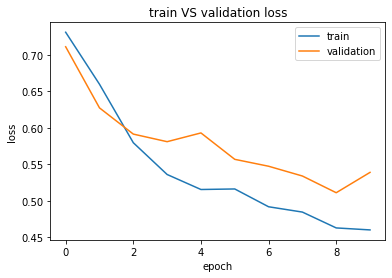

In [576]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train VS validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [577]:
test_2

,ID,shop_id,item_id,item_category_id,item_price,month,year
0,0,5,5037,19,749.500000,11,2
1,5100,4,5037,19,749.333333,11,2
2,10200,6,5037,19,1499.000000,11,2
3,15300,3,5037,19,1499.000000,11,2
4,20400,2,5037,19,749.500000,11,2
...,...,...,...,...,...,...,...
214195,193799,46,969,37,298.000000,11,2
214196,198899,41,969,37,549.000000,11,2
214197,203999,44,969,37,198.000000,11,2
214198,209099,39,969,37,398.000000,11,2


In [578]:
test_2.sort_values(['ID'], inplace = True)

In [44]:
test_2['item_price'] = std.fit_transform(test_2['item_price'].values.reshape(-1,1))

NameError: name 'std' is not defined

In [579]:
test1 = to_categorical(test_2['shop_id'])
test2 = to_categorical(test_2['item_category_id'])
test3 = to_categorical(test_2['month'],13 )
test4 = to_categorical(test_2['year'],3 )

In [582]:
test_2.head()

,ID,shop_id,item_id,item_category_id,item_price,month,year
0,0,5,5037,19,749.50000,11,2
42,1,5,5320,55,286.20937,11,2
84,2,5,5233,19,1199.00000,11,2
126,3,5,5232,23,599.00000,11,2
168,4,5,5268,20,2791.77982,11,2


In [581]:
test_3 = pd.concat([pd.DataFrame(test1), pd.DataFrame(test2), pd.DataFrame(test3), pd.DataFrame(test4)], axis = 1)

In [430]:
test_4 = test_3.values.reshape(test_3.shape[0], 1, test_3.shape[1])

In [431]:
result=model.predict(test_4)

In [392]:
result

array([[1562.2455 ],
       [ 264.6285 ],
       [1562.2455 ],
       ...,
       [ 263.83273],
       [ 197.74977],
       [ 518.02673]], dtype=float32)

In [612]:
test_5 = test_2

In [433]:
test_5 = test_5.rename(columns = {0:'item_price'})

In [613]:
test_5['item_price'] = std.fit_transform(test_5['item_price'].values.reshape(-1,1))
test_5['item_id'] = std.fit_transform(test_5['item_id'].values.reshape(-1,1))

In [614]:
test_5.head()

,ID,shop_id,item_id,item_category_id,item_price,month,year,item_id\t
0,0,5,-0.956781,19,-0.128928,11,2,-0.956781
42,1,5,-0.911520,55,-0.353667,11,2,-0.911520
84,2,5,-0.925434,19,0.089120,11,2,-0.925434
126,3,5,-0.925594,23,-0.201935,11,2,-0.925594
168,4,5,-0.919837,20,0.861765,11,2,-0.919837


In [615]:
test_5.sort_values(['ID'], inplace = True)

In [616]:
test1 = to_categorical(test_5['shop_id'])
test2 = to_categorical(test_5['item_category_id'])
test3 = to_categorical(test_5['month'],13 )
test4 = to_categorical(test_5['year'],3 )

In [617]:
test6 = pd.concat([pd.DataFrame(test1), pd.DataFrame(test2), pd.DataFrame(test3), pd.DataFrame(test4), test_5['item_price'], test_5['item_id']], axis = 1)

In [618]:
test6 = test6.values.reshape(test6.shape[0],1, test6.shape[1])

In [619]:
result1 = model1.predict(test6)

array([[2.1210928],
       [2.1210928],
       [2.1210928],
       ...,
       [2.1210928],
       [2.1210928],
       [2.1210928]], dtype=float32)

In [620]:
output = pd.concat([test_5['ID'], pd.DataFrame(result1)], axis = 1)

In [621]:
output.head()

,ID,0
0,0,-0.086684
1,5100,-0.114741
2,10200,-0.068716
3,15300,-0.104192
4,20400,0.031192


In [622]:
output.sort_values(['ID'], inplace = True)

In [623]:
output = output.rename(columns = {0:'item_cnt_month'})

In [624]:
output['item_cnt_month'] = output['item_cnt_month']-min(output['item_cnt_month'])

In [625]:
output.to_csv(r'C:\Users\user\Desktop\data\output.csv', index = False)

In [626]:
output

,ID,item_cnt_month
0,0,1.200822
42,1,1.386760
84,2,1.196680
126,3,1.301968
168,4,1.199732
...,...,...
214031,214195,1.193684
214073,214196,1.209206
214115,214197,1.158502
214157,214198,1.116721
